CODSOFT ----------------------- Task #2

**Build a model that predicts the rating of a movie based on
features like genre, director, and actors.**

Imports

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
rating_data = pd.read_csv("./ratings.dat",sep='::', engine='python')
rating_data.columns =['ID','MovieID','Ratings','TimeStamp']
rating_data.dropna(inplace=True)
rating_data.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [51]:
# Try reading with 'ISO-8859-1' encoding
try:
    movies_data = pd.read_csv('./movies.dat', delimiter='::', header=0, encoding='ISO-8859-1')
except UnicodeDecodeError:
    # If 'ISO-8859-1' doesn't work, try 'Windows-1252' encoding
    movies_data = pd.read_csv('./movies.dat', delimiter='::', header=0, encoding='Windows-1252')
movies_data.columns =['MovieIDs','MovieName','Category']
# Display the first few rows of the DataFrame
movies_data.head()


<ipython-input-51-5269884757a4>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_data = pd.read_csv('./movies.dat', delimiter='::', header=0, encoding='ISO-8859-1')


,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [52]:
user_data = pd.read_csv("./users.dat",sep='::', engine='python')
user_data.columns =['UserID','Gender','Age','Occupation','Zip-code']
user_data.dropna(inplace=True)
user_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [53]:
df = pd.concat([user_data, rating_data, movies_data], axis=1)
df.head()

,UserID,Gender,Age,Occupation,Zip-code,ID,MovieID,Ratings,TimeStamp,MovieIDs,MovieName,Category
0,2.0,M,56.0,16.0,70072,1,661,3,978302109,2.0,Jumanji (1995),Adventure|Children's|Fantasy
1,3.0,M,25.0,15.0,55117,1,914,3,978301968,3.0,Grumpier Old Men (1995),Comedy|Romance
2,4.0,M,45.0,7.0,02460,1,3408,4,978300275,4.0,Waiting to Exhale (1995),Comedy|Drama
3,5.0,M,25.0,20.0,55455,1,2355,5,978824291,5.0,Father of the Bride Part II (1995),Comedy
4,6.0,F,50.0,9.0,55117,1,1197,3,978302268,6.0,Heat (1995),Action|Crime|Thriller


ANALYSIS

Text(0.5, 0, 'Age')

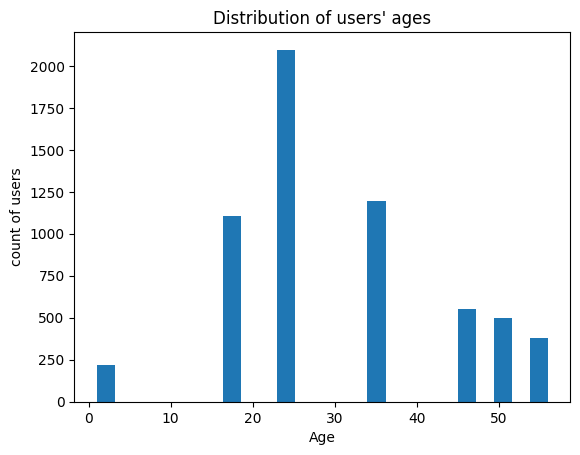

In [54]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [55]:
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})
df.head()

,UserID,Gender,Age,Occupation,Zip-code,ID,MovieID,Ratings,TimeStamp,MovieIDs,MovieName,Category
0,2.0,0.0,56.0,16.0,70072,1,661,3,978302109,2.0,Jumanji (1995),Adventure|Children's|Fantasy
1,3.0,0.0,25.0,15.0,55117,1,914,3,978301968,3.0,Grumpier Old Men (1995),Comedy|Romance
2,4.0,0.0,45.0,7.0,02460,1,3408,4,978300275,4.0,Waiting to Exhale (1995),Comedy|Drama
3,5.0,0.0,25.0,20.0,55455,1,2355,5,978824291,5.0,Father of the Bride Part II (1995),Comedy
4,6.0,1.0,50.0,9.0,55117,1,1197,3,978302268,6.0,Heat (1995),Action|Crime|Thriller


In [56]:
df.shape

(1000208, 12)

In [57]:
df = df.drop(columns=["MovieName", "Category","TimeStamp", "Zip-code"], axis=1)
df.dropna(inplace=True)
df.head()
df.shape

(3882, 8)

Text(0.5, 0, 'Ratings')

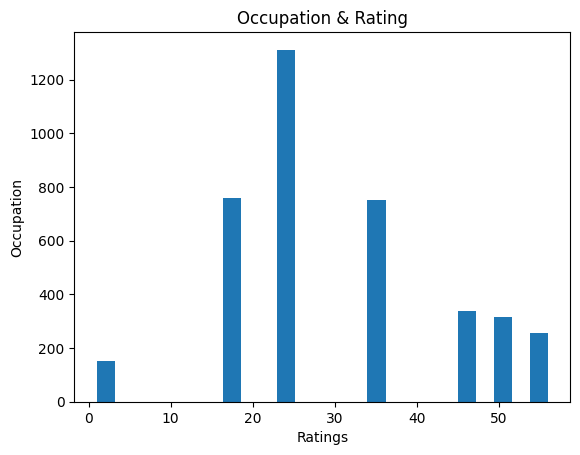

In [58]:
df.Age.plot.hist(bins=25)
plt.title("Occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')

In [59]:
y = df["Ratings"]
x = df.drop(columns=["Ratings"])
x

,UserID,Gender,Age,Occupation,ID,MovieID,MovieIDs
0,2.0,0.0,56.0,16.0,1,661,2.0
1,3.0,0.0,25.0,15.0,1,914,3.0
2,4.0,0.0,45.0,7.0,1,3408,4.0
3,5.0,0.0,25.0,20.0,1,2355,5.0
4,6.0,1.0,50.0,9.0,1,1197,6.0
...,...,...,...,...,...,...,...
3877,3879.0,0.0,25.0,3.0,28,334,3948.0
3878,3880.0,0.0,25.0,7.0,28,266,3949.0
3879,3881.0,0.0,18.0,2.0,28,2174,3950.0
3880,3882.0,0.0,56.0,14.0,28,912,3951.0


In [60]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.35, shuffle=True)

In [65]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
error=mean_squared_error(Y_test,Y_pred)
print(f"Error: {error:.2f}")

Error: 1.14
